# Utilisation des terres par région pour répondre à la consommation finale.

Nous voulons dans cette partie examiner la part de la consommation finale pour chaque région qui est satisfaite par la production locale et par la production externe associée à l'utilisation des terres. Cela permet d'analyser l'auto-suffisance et les dépendances externes de chaque région pour les productions utilisant les terres au cours du temps. Cela permet d'avoir un meilleur aperçu des régions qui ont la capacité de satisfaire une grande partie de leur consommation finale et de limiter leurs importations, mais met également en avant les régions qui dépendent économiquement d'autres régions pour répondre aux besoins de leur consommation finale.

In [1]:
#importations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter
import imageio

Nous avons utilisé les bases de données en format CSV que nous avons obtenu lors du nettoyage des bases de données d'EXIOBASE3 entre 1995 et 2022 afin d'obtenir les DataFrames correspondant aux niveaux d'utilisations des terres par chaque région et destinés à la consommation finale que vous pouvez retrouver ici (mettre le lien).

Pour déterminer leur niveau d'importation de la production nécessitant l'utilisation des terres, nous avons normalisé nos [DataFrames](https://github.com/MarDrd/exiobase3-manipulation/tree/main/Impact%20-%20Consommation%20Finale/LandUse%20-%20Consommation%20Finale/LandUse%20-%20Data) en suivant ces étapes :
1. Calculer la somme de chacune de nos colonnes, qui correspondent toutes à une région réceptrice de ce type de production.
2. Diviser chaque valeur de la colonne par la somme de cette même colonne.

Cette opération permet d'obtenir la part de la consommation finale associée à la production nécessitant l'utilisation des terres qui est importée ou produite localement.



In [2]:
#Fonction pour charger les bases de données cvs pour chaque année
def load(year):
    #Charger les bases de données csv
    df = pd.read_csv(f'C:\\Master 1\\exiobase3-manipulation\\Impact - Consommation Finale\\LandUse - Consommation Finale\\LandUse - Data\\df_LandUse_{year}.csv')

    #Changer l'ordre des régions pour les lignes et les colonnes
    order = ["Afrique","Brésil","Amerique Latine et Caraïbes", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", "Asie Pacifique",
             "Canada",  "Chine","Etats-Unis", "Europe", "Union européenne",  "Moyen-Orient",  "Japon"]
    df = pd.DataFrame(df, index=order)
    df = df[order]
    
    #Résultat de la fonction 'load'
    return df

# Dictionnaire vide pour stocker les DataFrame obtanues grâce à la loop
data = {}

#Loop pour chaque année entre 1995 et 2022
for year in range(1995, 2023):

    #Charger les données pour une des années
    df_year = load(year)
    
    #Calculer la somme de chaque colonne de la DataFrame pour cette année
    df_year_imp = df_year.sum(axis=0)
    
    #Division de chaque éléments des colonnes par la somme obtenue précedemment et mettre en pourcentage
    df_year_norm = df_year.div(df_year_imp, axis=1) * 100
    
    #Stocker la DataFrame dans le dictionnaire
    data[year] = df_year_norm

# Création d'un répertoire 'LandUse_Imp_heatmap' pour enregistrer les cartes thermiques
os.makedirs('LandUse_Imp_heatmap', exist_ok=True)

#Boucle pour créer une heatmap pour chaque année
for year, df_norm in data.items():

    #Création d'astériques
    regions_ast = ["Afrique$^{1}$","Brésil","Amerique Latine\net Caraïbes$^{2}$", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", 
                   "Asie Pacifique$^{3}$", "Canada",  "Chine","Etats-Unis", "Europe$^{4}$", "Union\neuropéenne$^{5}$",  "Moyen-Orient$^{6}$",  "Japon"]
    

    #Ajouter les astériques pour les lignes et les colonnes
    df_norm.columns = regions_ast
    df_norm.index = regions_ast

    #Label des lignes et colonnes
    df_norm.columns.name = "Région réceptrice d'utilisation des terres"
    df_norm.index.name = "Région source d'utilisation des terres"
    
    
    #Taille de la figure
    plt.figure(figsize=(30, 15))
    
    #Création d'une carte thermique des DataFrames
    sns.heatmap(df_norm, norm=LogNorm(vmin=0.8, vmax=97),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

    
    #Titre de la carte thermique
    plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale en {year}", fontsize=14, fontweight='bold', y=-0.09)
    
    #Permet d'ajuster la positions des éléments de la carte thermique
    plt.subplots_adjust(bottom=0.3)

    #Création des notes en bas de pages associées aux astériques
    plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
    plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
    plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
    plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
    plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
    plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

    #Ajuster l'espacements des éléments de la carte thermique
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    ##Sauvegarder la carte de thermique
    frame_filename = f"C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse - Heatmap\LandUse_Importation\LandUse_All\LandUse_Imp_{year}.png"
    plt.savefig(frame_filename, bbox_inches='tight')
    
    #Pour fermer la carte thermique
    plt.close()


In [3]:
#Initialisation : liste vide pour stocker les images créées
images = []

#Création d'une boucle pour chaque année du dictionnaire 'data'
for year in data.keys():
    frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse - Heatmap\LandUse_Importation\LandUse_All\LandUse_Imp_{year}.png'
    #Charge l'image et l'ajoute à la liste 'images'
    images.append(imageio.imread(frame_filename))

#Nom du fichier GIF
gif_filename = 'LandUse_FinalConso_Imp_Heatmap.gif'

#Création du GIF
imageio.mimsave(gif_filename, images, duration=1000, loop=0)

C:\Users\Marie\AppData\Local\Temp\ipykernel_21148\3678806469.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_filename))


### Evaluer les dépendances de chaque régions.

Afin d'avoir un meilleur aperçu de l'évolution de la part de la consommation finale associée à la production nécessitant l'utilisation des terres qui est importée ou produite localement entre 1995 et 2022, nous avons isolé les valeurs de la diagonale de chaque pays. Ces valeurs correspondent à la part de l'utilisation locale pour répondre à la consommation finale de chaque pays. Une valeur élevée signifie que la région dépend faiblement des importations pour les productions issues de l'utilisation des terres, tandis qu'une valeur faible signifie que la région dépend fortement des importations pour répondre à son niveau de consommation finale.

In [4]:
#Création de la fonction 'load'
def load(year):
    #Charger les bases de données csv pour chaque année
    df = pd.read_csv(f'C:\\Master 1\\exiobase3-manipulation\\Impact - Consommation Finale\\LandUse - Consommation Finale\\LandUse - Data\\df_LandUse_{year}.csv')
    
    #Liste définissant l'ordre des régions
    order = ["Afrique", "Brésil", "Amerique Latine et Caraïbes", "Indonésie", "Russie", "Inde", "Australie", "Mexique", "Asie Pacifique",
             "Canada", "Chine", "Etats-Unis", "Europe", "Union européenne", "Moyen-Orient", "Japon"]
         
    #Calculer la somme de chaque colonne de la DataFrame pour cette année         
    df_year_imp = df.sum(axis=0)
    
    #Division de chaque éléments des colonnes par la somme obtenue précedemment et mettre en pourcentage
    df_year_norm = df.div(df_year_imp, axis=1) * 100

    #Changer l'odre des régions qui pour les lignes et les colonnes avec la liste 'order'
    df1 = pd.DataFrame(df_year_norm, index=order)
    df1 = df1[order]
    
    #Extraire les valeurs de la diagonale
    diagonal_val = df1.values.diagonal()
    
    #Création d'une DataFrame avec les valeurs de la diagonale
    df_diag = pd.DataFrame(diagonal_val, index=order, columns=[f'{year}'])
    
    #Résultat de la fonction 'load'
    return df_diag

In [5]:
#Initialisation avec une liste vide
dfs_diag = []

#Boucle pour extraire les diagonales pour chaque années et en faire une DataFrame
for year in range(1995, 2023):
    df_diag = load(year)
    dfs_diag.append(df_diag)

#Merge toutes les DataFrame ensemble
df_diagonale = pd.concat(dfs_diag, axis=1)

#Afficher la DataFrame
df_diagonale

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Afrique,96.786605,97.308640,96.298843,96.577844,96.863123,96.739414,96.302496,95.191913,95.812744,95.569038,...,93.813656,94.048703,95.275866,95.099390,93.945406,94.004600,94.334366,94.282711,94.561800,94.491484
Brésil,92.740848,95.140189,94.362572,94.395430,95.535639,94.899351,95.622467,94.495256,95.560575,95.554221,...,91.861490,91.924200,91.535108,92.509791,92.507480,90.916159,91.209116,90.472607,90.319337,90.642772
Amerique Latine et Caraïbes,93.260883,90.655779,90.499796,89.637866,89.445850,90.126333,89.568309,89.060771,90.118357,88.826913,...,84.801724,85.692437,83.669153,86.298178,85.776297,85.443509,85.967738,85.469963,85.674468,85.685321
Indonésie,70.870250,67.887337,64.062760,63.139314,81.149440,82.976420,81.896663,82.521754,86.529792,82.215050,...,78.180699,79.644911,80.621928,81.171048,79.584784,76.896017,81.401729,81.185388,82.255931,83.509808
Russie,91.760558,95.915521,92.358203,94.063098,93.317540,91.131970,92.536699,92.798766,92.832652,91.122651,...,81.693532,87.777238,87.819413,85.964650,86.107345,84.303193,85.518199,85.043019,83.552684,82.906274
Inde,94.273837,89.464836,85.150720,82.270125,82.079046,88.571463,88.739952,87.074773,85.248028,86.163973,...,71.345641,73.221941,76.595652,77.263810,79.931879,80.444804,83.135115,82.410671,82.003067,82.042090
Australie,92.613776,92.732214,91.787796,92.650383,91.587317,91.663643,92.029718,91.493585,92.558382,89.258773,...,84.274335,83.979616,80.418129,82.852379,80.256294,77.118525,75.444286,74.176200,76.987188,76.158624
Mexique,87.844446,84.477995,82.427812,80.621243,78.098956,76.256056,74.155780,73.927181,76.099049,73.622062,...,79.074332,77.887912,74.723309,75.863799,77.392628,75.740476,76.300410,76.142417,75.210966,72.594513
Asie Pacifique,71.954577,69.874973,67.625003,70.934166,70.772357,68.900943,73.977852,72.682978,74.516538,68.319976,...,59.531354,65.804837,69.757757,69.573429,67.879272,67.087951,67.397863,68.426584,67.713901,67.136361
Canada,69.790199,81.035373,77.337304,75.660296,71.946204,78.855777,77.589607,81.918147,82.535760,82.512258,...,77.374633,72.727782,74.260737,71.666036,73.154160,69.745486,69.840898,67.348770,67.061497,67.015564


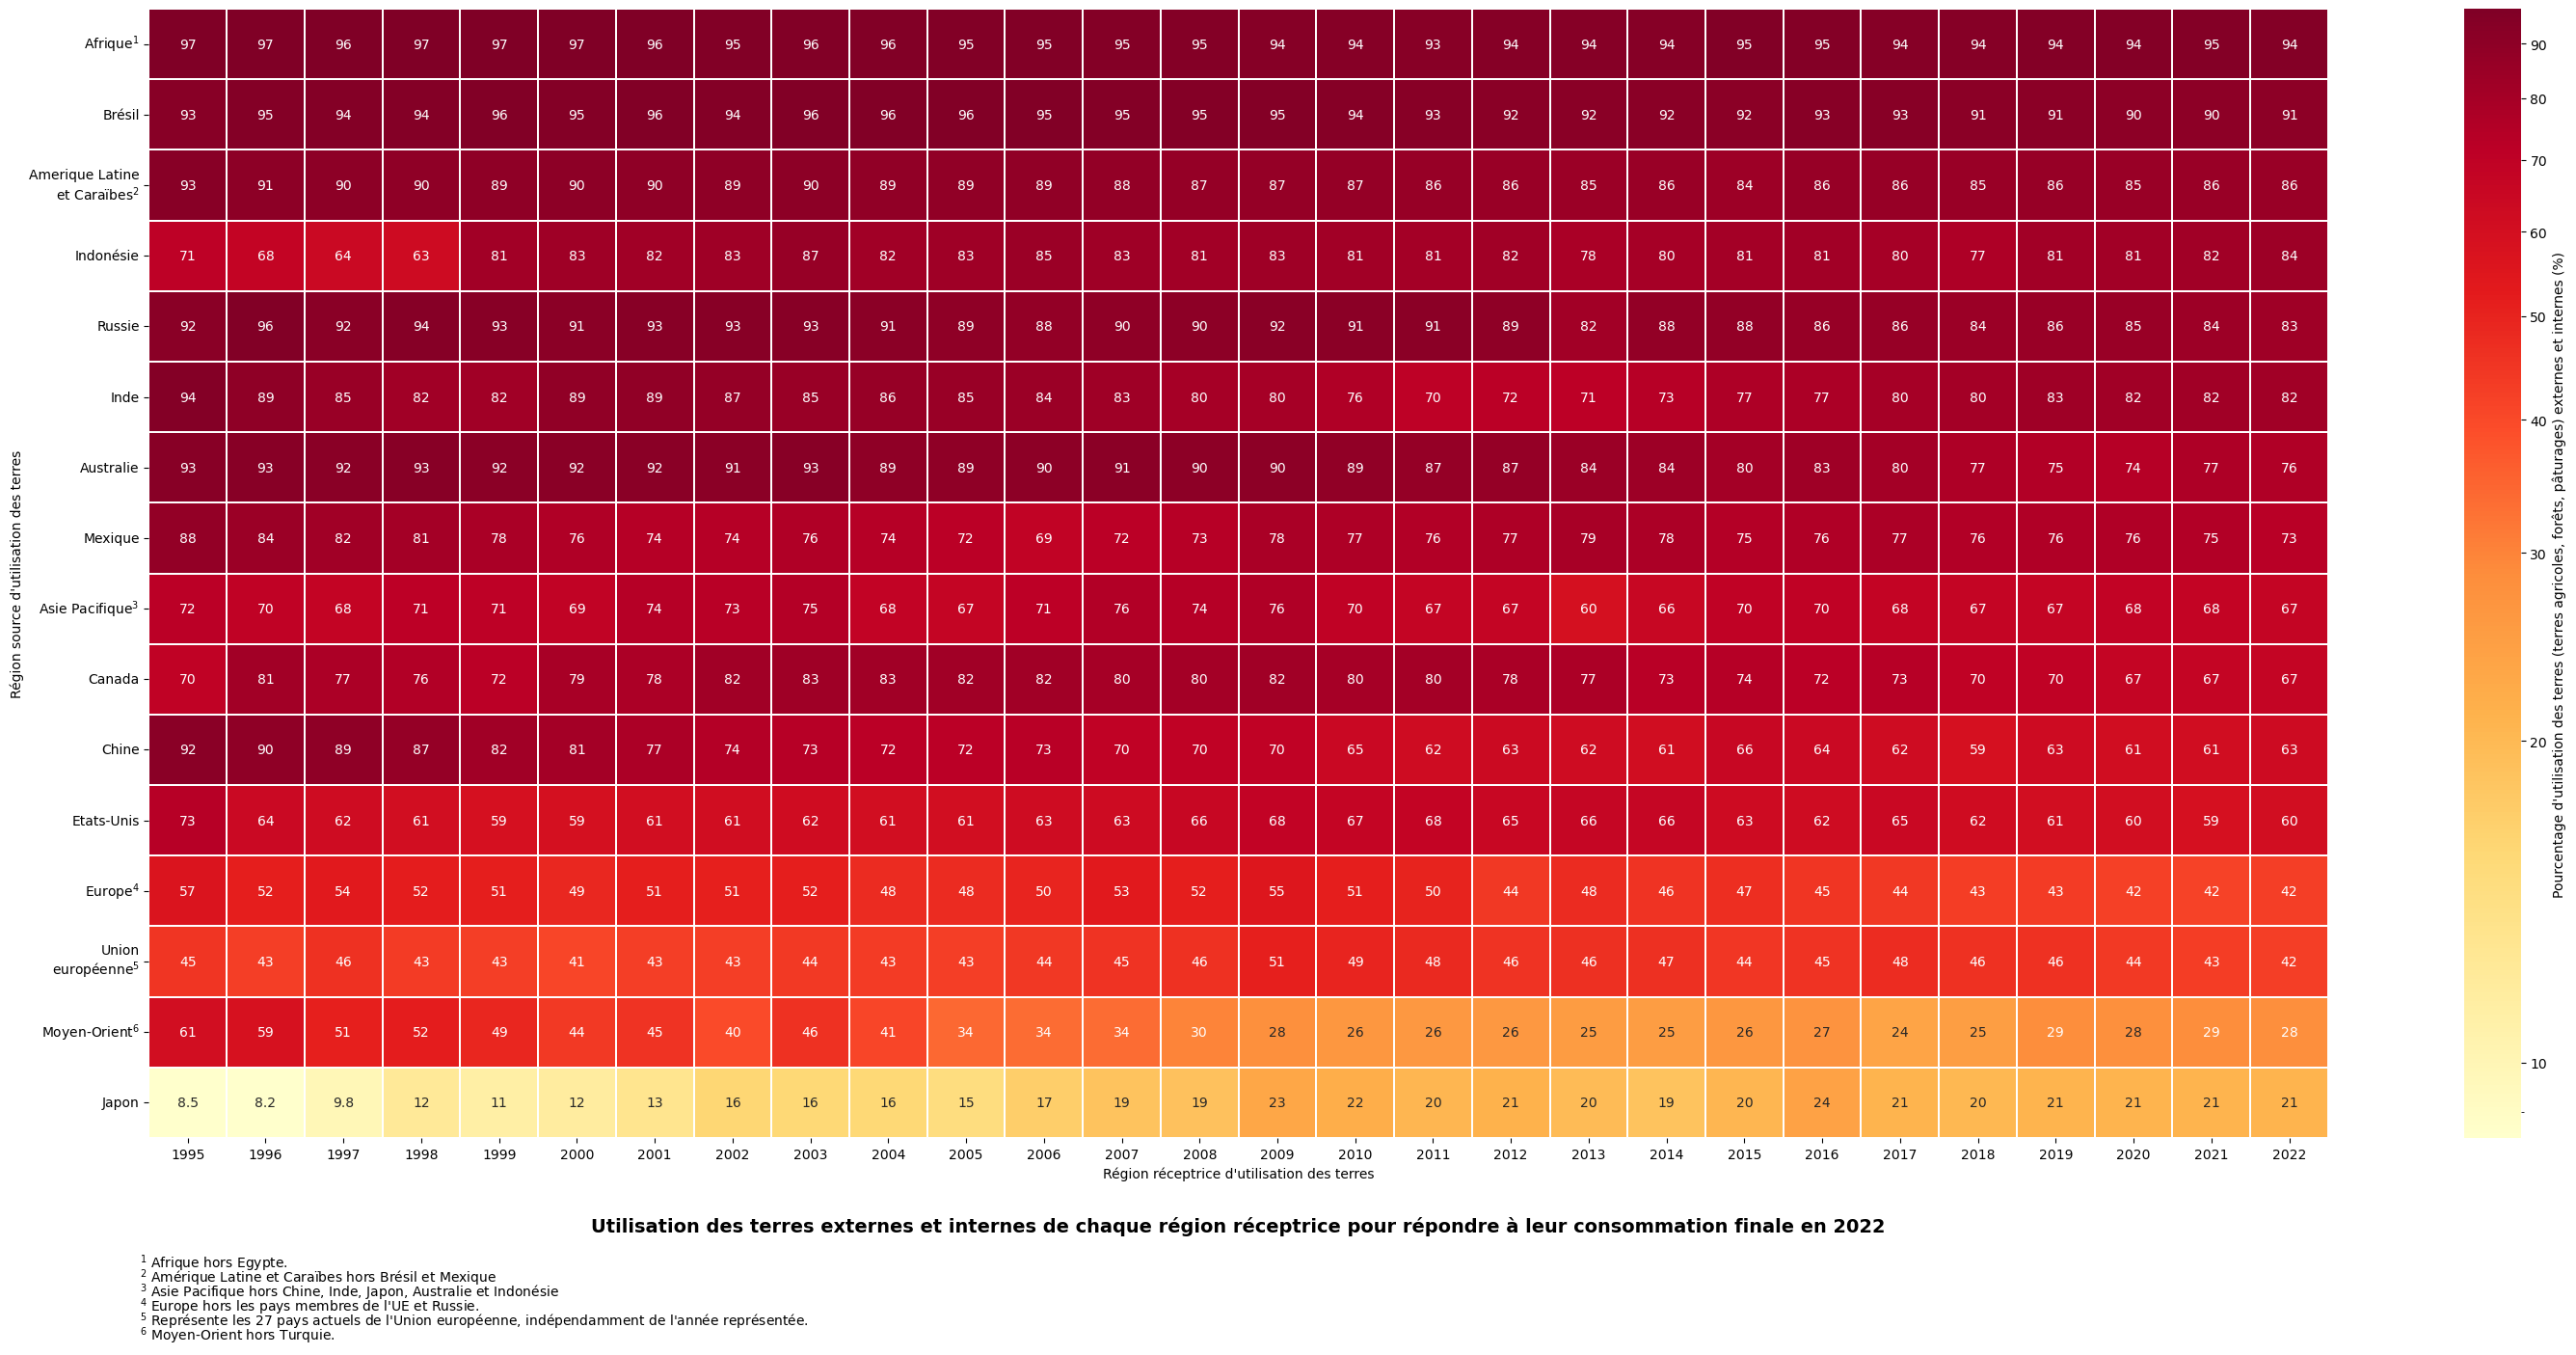

In [6]:
#Création des astériques
regions_ast = ["Afrique$^{1}$","Brésil","Amerique Latine\net Caraïbes$^{2}$", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", 
                   "Asie Pacifique$^{3}$", "Canada",  "Chine","Etats-Unis", "Europe$^{4}$", "Union\neuropéenne$^{5}$",  "Moyen-Orient$^{6}$",  "Japon"]
    
#Modifier le noms des régions des colonnes et des lignes avec la liste 'region_ast'
df_diagonale.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df_diagonale.columns.name = "Région réceptrice d'utilisation des terres"
df_diagonale.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df_diagonale, norm=LogNorm(vmin=8.5, vmax=97),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale en {year}", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_{year}.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


Afin de visualiser plus facilement cette évolution, nous avons décidé de créer une heatmap, qui met en avant facilement le niveau de dépendances de chaque régions. En effet, le rouge vif signifie que la région n'est pas majoritairement dépendante des importation, à l'opposé le blanc met en avant que la région est majoritairement dépendante des importations pour les produits issues de l'utilisations des terres.

L'utilisation de l'échelle logarithmique permet d'observer facilement l'évolution de la part des importations pour les régions très dépendantes de la production des autres régions. Cependant, nos valeurs allant de 8,5 % à 97 % empêchent de voir correctement l'évolution des importations pour les pays faiblement dépendants des importations avec une échelle logarithmique. Pour cela, nous avons divisé cette heatmap en deux.

Nous avons regroupé dans une première carte thermique les régions faiblement dépendantes des importations, telles que l'Afrique, le Brésil, l'Amérique Latine et les Caraïbes, l'Indonésie, la Russie, l'Inde, l'Australie, le Mexique, l'Asie-Pacifique, le Canada et la Chine, avec lesqules nous allons visualiser les données sans utiliser l'échelle logarithmique. Dans une seconde carte thermique, nous avons regroupé les régions fortement dépendantes des importations, telles que les États-Unis, l'Europe, l'Union européenne, le Moyen-Orient et le Japon en utilisant une échelle logarithmique.

In [7]:
#Creation d'une nouvelle DataFrame avec les 11 premières lignes de la DataFrame 'df_diagonale'
df2 = df_diagonale.head(11)

#Creation d'une nouvelle DataFrame avec les 5 dernières lignes de la DataFrame 'df_diagonale'
df3 = df_diagonale.tail(5)


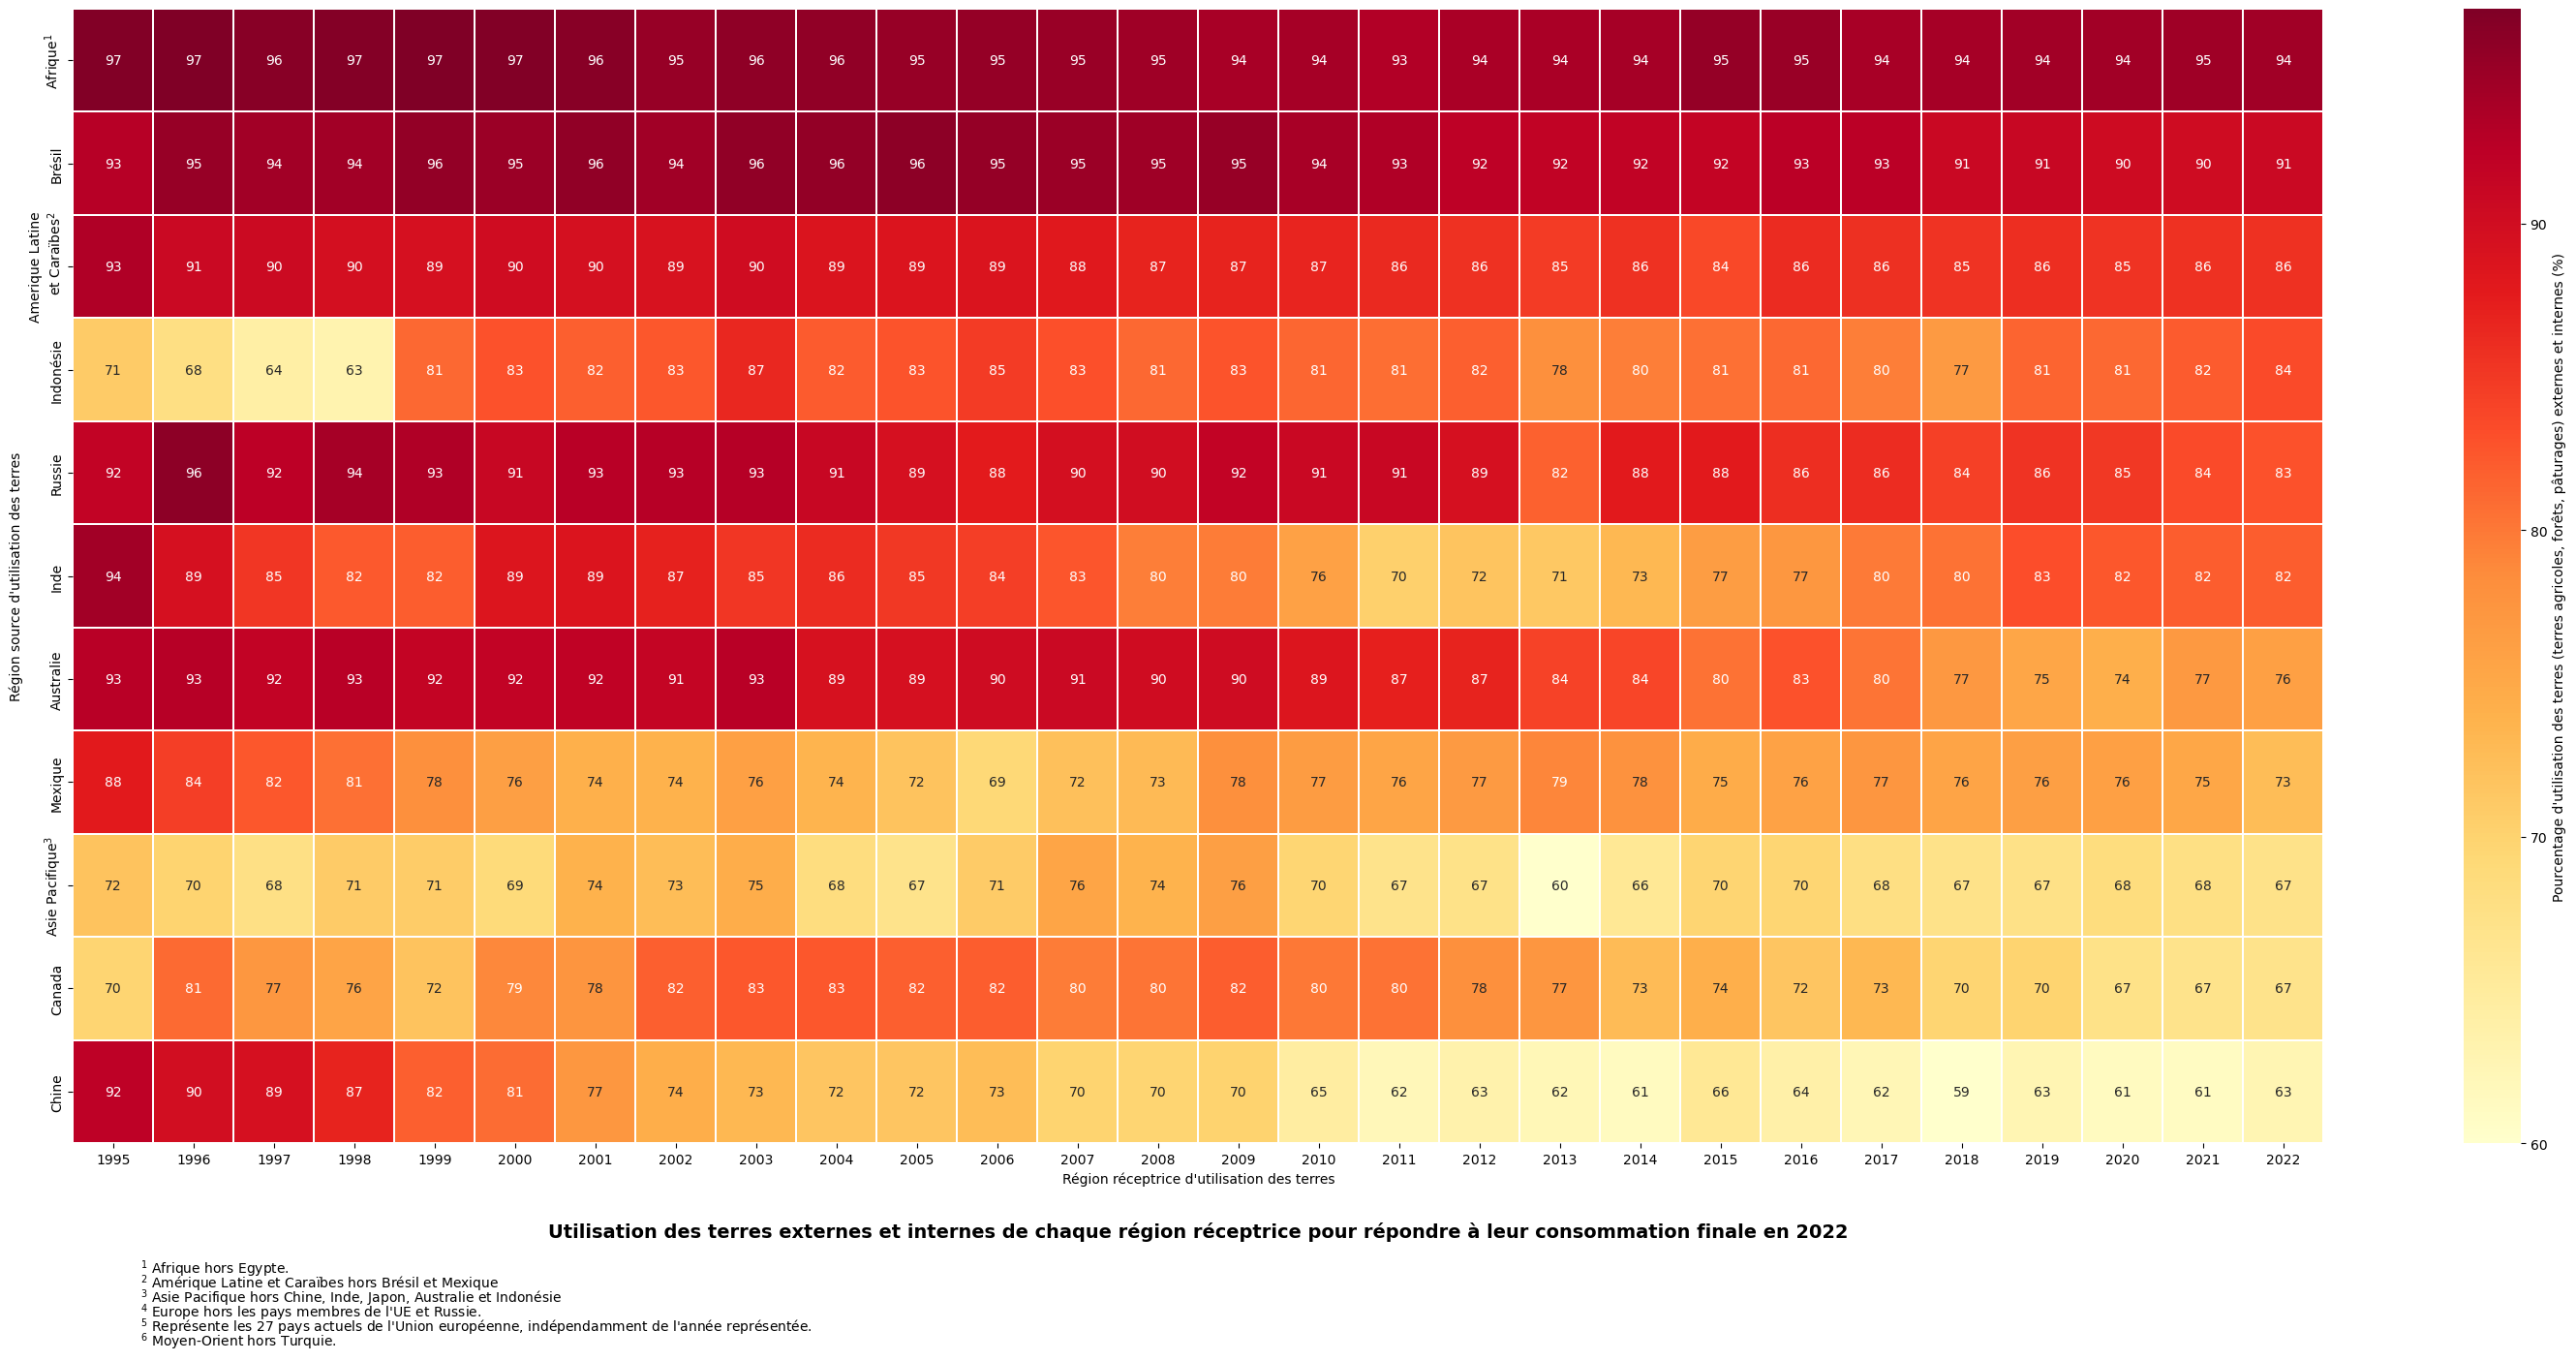

In [8]:
#Création d'astériques
regions_ast = ["Afrique$^{1}$","Brésil","Amerique Latine\net Caraïbes$^{2}$", "Indonésie", "Russie", "Inde",  "Australie", "Mexique", 
                   "Asie Pacifique$^{3}$", "Canada",  "Chine"]
    

#Modifier le noms des régions des lignes avec la liste 'region_ast'
df2.index = regions_ast

#Donner un label aux colonnes et aux lignes
df2.columns.name = "Région réceptrice d'utilisation des terres"
df2.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df2, vmin=60, vmax=97,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale en {year}", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_df2_{year}.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


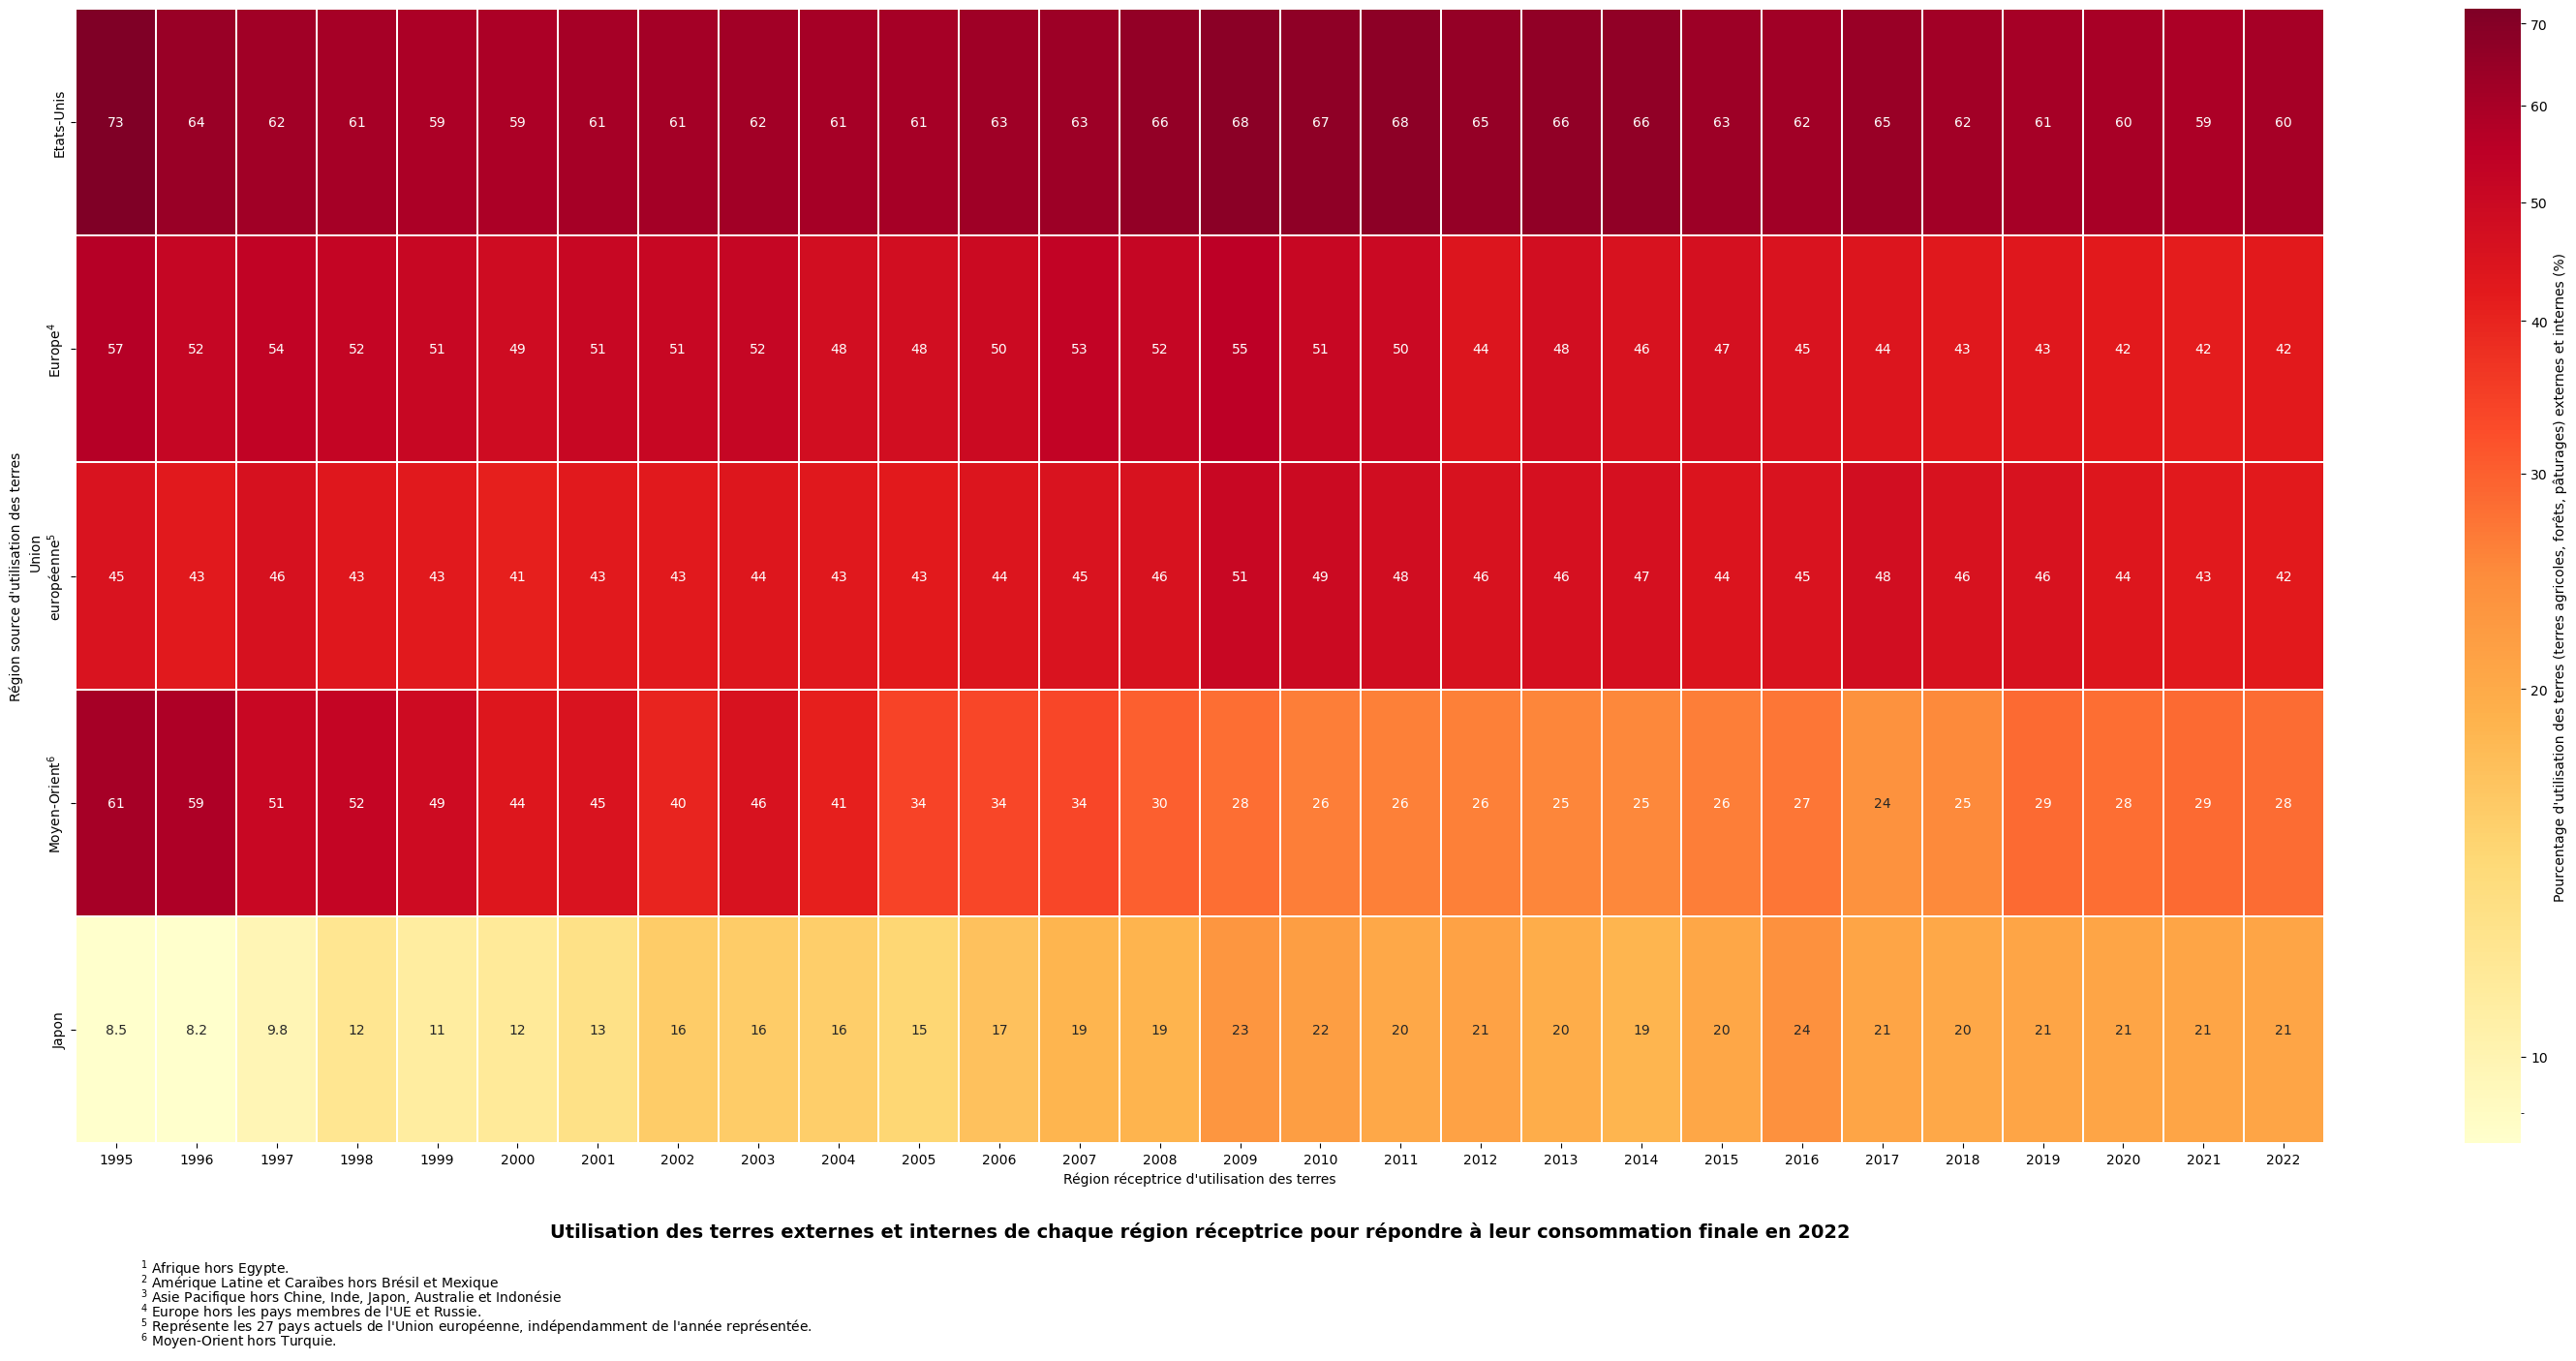

In [122]:
#Création d'astériques
regions_ast = ["Etats-Unis", "Europe$^{4}$", "Union\neuropéenne$^{5}$",  "Moyen-Orient$^{6}$",  "Japon"]
    
#Modifier le noms des régions des lignes avec la liste 'region_ast'
df3.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df3.columns.name = "Région réceptrice d'utilisation des terres"
df3.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df3, norm=LogNorm(vmin=8.5, vmax=72),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale en {year}", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques    
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Moyen-Orient hors Turquie.', fontsize=10)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_df3_{year}.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


Pour plus de clarté, nous allons par la suite ne conserver dans notre carte thermique que les pays dont l'évolution de la part des importations est très instable au cours du temps. 

Pour la première carte thermique, qui réprésente les régions les moins dépendantes aux importations, nous allons garder l'Indonésie, l'Inde, l'Australie, le Mexique, l'Asie-Pacifique, le Canada et la Chine.

Pour la seconde carte thermique, qui réprésente les régions les plus dépendantes aux importations, nous allons conserver uniquement le Moyen-Orient et le Japon.

In [189]:
#Liste des régions que l'on veut garder dans nos DataFrame
index = ["Indonésie", "Inde", "Australie", "Mexique", "Canada", "Chine"]
index1 = ["Moyen-Orient", "Japon"]

#DataFrame avec les pays dans la liste 'index'
df4 = df_diagonale.loc[index]

#DataFrame avec les pays dans la liste 'index1'
df5 = df_diagonale.loc[index1]

Région réceptrice d'utilisation des terres,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Indonésie,70.870250,67.887337,64.062760,63.139314,81.149440,82.976420,81.896663,82.521754,86.529792,82.215050,...,78.180699,79.644911,80.621928,81.171048,79.584784,76.896017,81.401729,81.185388,82.255931,83.509808
Inde,94.273837,89.464836,85.150720,82.270125,82.079046,88.571463,88.739952,87.074773,85.248028,86.163973,...,71.345641,73.221941,76.595652,77.263810,79.931879,80.444804,83.135115,82.410671,82.003067,82.042090
Australie,92.613776,92.732214,91.787796,92.650383,91.587317,91.663643,92.029718,91.493585,92.558382,89.258773,...,84.274335,83.979616,80.418129,82.852379,80.256294,77.118525,75.444286,74.176200,76.987188,76.158624
Mexique,87.844446,84.477995,82.427812,80.621243,78.098956,76.256056,74.155780,73.927181,76.099049,73.622062,...,79.074332,77.887912,74.723309,75.863799,77.392628,75.740476,76.300410,76.142417,75.210966,72.594513
Canada,69.790199,81.035373,77.337304,75.660296,71.946204,78.855777,77.589607,81.918147,82.535760,82.512258,...,77.374633,72.727782,74.260737,71.666036,73.154160,69.745486,69.840898,67.348770,67.061497,67.015564
Chine,92.159416,89.858681,89.398908,86.969385,81.856665,80.909934,77.336512,74.402069,73.252020,71.658117,...,62.244967,61.342950,65.784499,63.884723,62.370234,58.904160,62.683046,61.343792,61.143458,62.678071


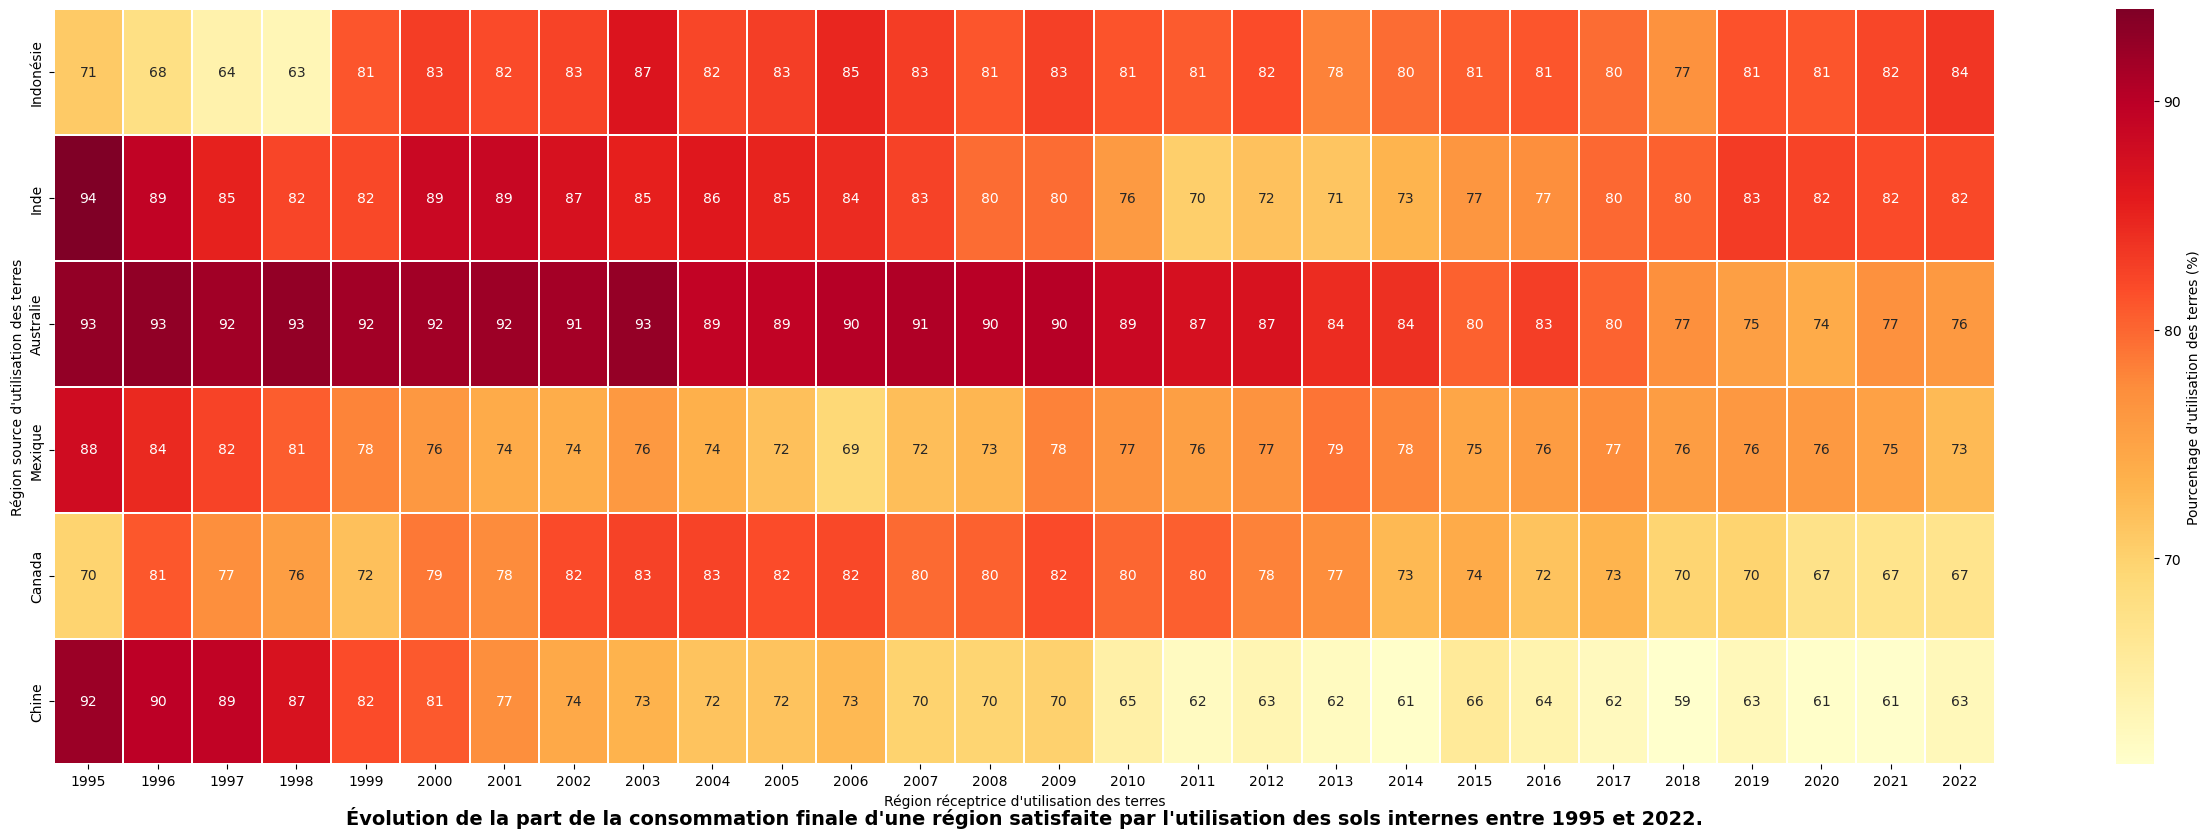

In [190]:
#Donner un noms aux colonnes et aux lignes
df4.columns.name = "Région réceptrice d'utilisation des terres"
df4.index.name = "Région source d'utilisation des terres"
    
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(25, 10))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df4, vmin=61, vmax=94,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Évolution de la part de la consommation finale d'une région satisfaite par l'utilisation des sols internes entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.09)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_High.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


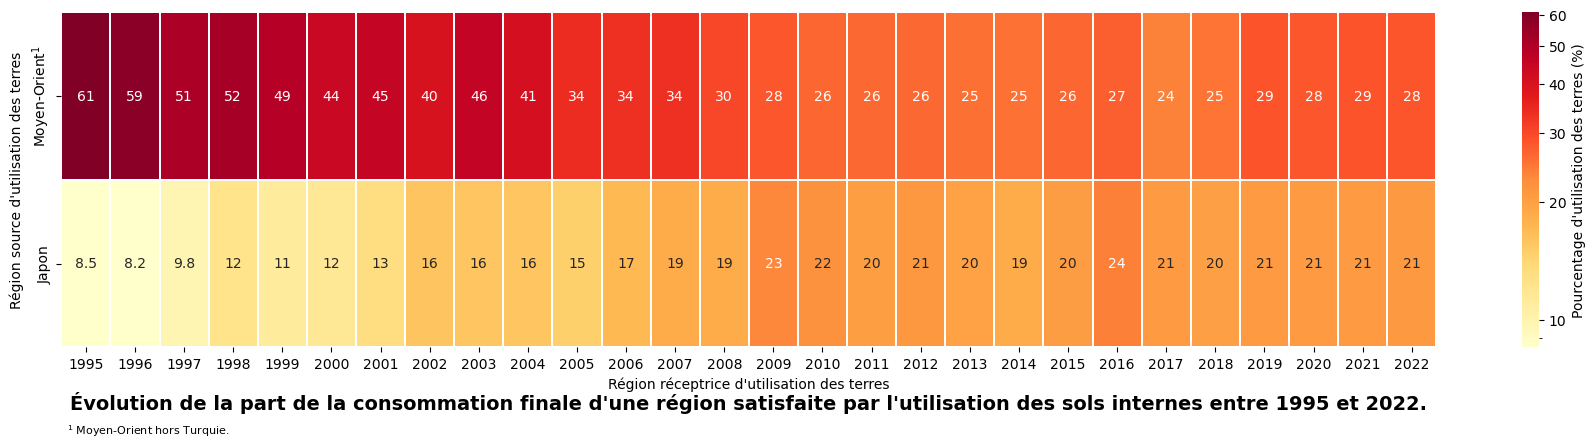

In [192]:
#Création d'astériques
regions_ast = ["Moyen-Orient$^{1}$",  "Japon"]
    
#Modifier le noms des régions des lignes avec la liste 'region_ast'
df5.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df5.columns.name = "Région réceptrice d'utilisation des terres"
df5.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(18, 5))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df5, norm=LogNorm(vmin=8.5, vmax=61),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Évolution de la part de la consommation finale d'une région satisfaite par l'utilisation des sols internes entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.21)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.04, 0.07, '$^{1}$ Moyen-Orient hors Turquie.', fontsize=8)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_Low.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()
